In [1]:
import pandas as pd

In [2]:
# read in data
df = pd.read_csv("titanic_ml/train.csv")

In [3]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
#rename headers

df = df.rename(columns = {
    "PassengerId": "passenger_id",
    "Survived": "survived",
    "Pclass": "ticket_class",
    "Name": "name",
    "Sex": "sex",
    "Age": "age",
    "SibSp": "siblings_spouses",
    "Parch": "parents_children",
    "Ticket": "ticket_num",
    "Fare": "fare",
    "Cabin": "cabin",
    "Embarked": "embarked_port"
})

df.head()

,passenger_id,survived,ticket_class,name,sex,age,siblings_spouses,parents_children,ticket_num,fare,cabin,embarked_port
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
#count NaNs

df.isna().sum()

passenger_id          0
survived              0
ticket_class          0
name                  0
sex                   0
age                 177
siblings_spouses      0
parents_children      0
ticket_num            0
fare                  0
cabin               687
embarked_port         2
dtype: int64

In [7]:
# Fill cabin NaNs randomly

df['cabin'] = df['cabin'].fillna(method = 'ffill')

df['cabin'] = df['cabin'].fillna('D85', limit = 1)

In [8]:
# Replace NaNs in age with average

# df['age'].mean()

df['age'] = df['age'].fillna(29.7)

df.head()

,passenger_id,survived,ticket_class,name,sex,age,siblings_spouses,parents_children,ticket_num,fare,cabin,embarked_port
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,D85,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,C85,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,C123,S


In [13]:
# Fill in embarked port NaNs randomly

df['embarked_port'] = df['embarked_port'].fillna(method = 'ffill')

In [14]:
#count NaNs

df.isna().sum()

passenger_id        0
survived            0
ticket_class        0
name                0
sex                 0
age                 0
siblings_spouses    0
parents_children    0
ticket_num          0
fare                0
cabin               0
embarked_port       0
dtype: int64

In [10]:
#check outputs 
df["survived"].value_counts()

0    549
1    342
Name: survived, dtype: int64

<AxesSubplot:>

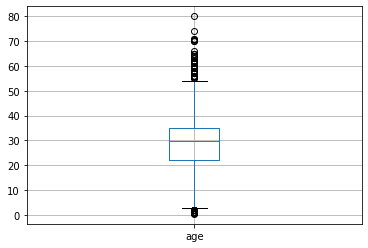

In [18]:
df.boxplot(column = 'age')

In [21]:
# create bins for age

df['age_bucket'] = pd.qcut(df['age'], 5)

In [22]:
df['age_bucket'].value_counts()

(28.0, 29.7]     199
(20.0, 28.0]     183
(0.419, 20.0]    179
(38.0, 80.0]     177
(29.7, 38.0]     153
Name: age_bucket, dtype: int64

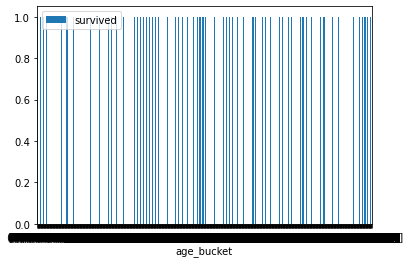

In [25]:
# Create plots showing difference in survival rates by age

# ax = df.plot.bar(x='age_bucket', y='survived', rot=0)

if survived == 0:
    df.hist(bins=3)
